In [1]:
import pandas as pd

In [2]:
comment5 = pd.read_csv("comments5.csv")

In [3]:
print("\nComments 5")
print(comment5.head())


Comments 5
              kind  commentId  channelId  videoId  authorId  \
0  youtube#comment     600702      21224    91712    463359   
1  youtube#comment     549057      50201    53793   1125630   
2  youtube#comment     804966      29145    61224   3309637   
3  youtube#comment    1302885      13098    30730   1408547   
4  youtube#comment    2744696      48794    31684    777869   

                                        textOriginal  parentCommentId  \
0                                            So true              NaN   
1                                                🤯😲😳              NaN   
2                                               Link              NaN   
3  Half of those skincare came from different cul...              NaN   
4                         She’s the twin of Timothee              NaN   

   likeCount                publishedAt                  updatedAt  
0          0  2024-04-22 15:14:26+00:00  2024-04-22 15:14:26+00:00  
1          0  2025-01-08 15:33:2

In [4]:
print("COMMENT 5")

print("\nMissing values per column:")
print(comment5.isnull().sum())

print("\nNumber of duplicate rows:")
print(comment5.duplicated().sum())

print("\nShape before dropping duplicates:")
print(comment5.shape)

comment5.drop_duplicates(inplace=True)
print("\nDataFrame shape after dropping duplicates:")
print(comment5.shape)


COMMENT 5

Missing values per column:
kind                    0
commentId               0
channelId               0
videoId                 0
authorId                0
textOriginal           39
parentCommentId    645633
likeCount               0
publishedAt             0
updatedAt               0
dtype: int64

Number of duplicate rows:
0

Shape before dropping duplicates:
(725015, 10)

DataFrame shape after dropping duplicates:
(725015, 10)


In [5]:
videos = pd.read_csv("videos.csv")
print(videos)

                kind  videoId                publishedAt  channelId  \
0      youtube#video    85806  2024-01-15 00:59:29+00:00      33807   
1      youtube#video    30556  2023-10-27 19:32:16+00:00      46650   
2      youtube#video    51771  2024-09-28 01:23:22+00:00      14346   
3      youtube#video    45298  2023-07-13 15:19:28+00:00      50139   
4      youtube#video    43611  2023-04-29 18:47:37+00:00       8143   
...              ...      ...                        ...        ...   
92754  youtube#video    26001  2023-12-28 21:04:42+00:00      35305   
92755  youtube#video    34584  2021-04-15 12:08:32+00:00       6127   
92756  youtube#video    21075  2023-04-27 04:07:06+00:00       7271   
92757  youtube#video    44523  2025-04-27 11:16:59+00:00      42969   
92758  youtube#video    46938  2024-12-02 05:04:56+00:00      14677   

                                                   title  \
0      Unlocking the Benefits of Face Masks for Skin ...   
1      Get ready for the Ma

In [6]:
print("\nMissing values per column:")
print(videos.isnull().sum())

print("\nNumber of duplicate rows:")
print(videos.duplicated().sum())

print("\nShape before dropping duplicates:")
print(videos.shape)

videos.drop_duplicates(inplace=True)
print("\nDataFrame shape after dropping duplicates:")
print(videos.shape)


Missing values per column:
kind                        0
videoId                     0
publishedAt                 0
channelId                   0
title                       0
description             57522
tags                    71868
defaultLanguage         76974
defaultAudioLanguage    62803
contentDuration          1267
viewCount                1269
likeCount                6129
favouriteCount           1267
commentCount             2465
topicCategories          1531
dtype: int64

Number of duplicate rows:
0

Shape before dropping duplicates:
(92759, 15)

DataFrame shape after dropping duplicates:
(92759, 15)


In [7]:
import pandas as pd
import numpy as np
import re
import string

# === Load dataset ===
file_path = "comments5.csv"   # change path if needed
df = pd.read_csv(file_path)

# === Make a copy ===
df_clean = df.copy()

# 1. Drop redundant column
if "kind" in df_clean.columns:
    df_clean = df_clean.drop(columns=['kind'])

# 2. Handle missing values (remove rows with missing comments)
df_clean = df_clean.dropna(subset=['textOriginal']).reset_index(drop=True)

# 3. Text cleaning function
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[0-9]+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

# Apply cleaning
df_clean['clean_text'] = df_clean['textOriginal'].apply(clean_text)

# 4. Convert datetime columns
df_clean['publishedAt'] = pd.to_datetime(df_clean['publishedAt'], errors='coerce')
df_clean['updatedAt'] = pd.to_datetime(df_clean['updatedAt'], errors='coerce')

# 5. Extract useful time features
df_clean['published_year'] = df_clean['publishedAt'].dt.year
df_clean['published_month'] = df_clean['publishedAt'].dt.month
df_clean['published_day'] = df_clean['publishedAt'].dt.day
df_clean['published_hour'] = df_clean['publishedAt'].dt.hour

# 6. Handle parentCommentId (fill NaN with 0)
df_clean['parentCommentId'] = df_clean['parentCommentId'].fillna(0).astype(int)

# 7. Normalize likeCount (log transform to reduce skew)
df_clean['likeCount_norm'] = np.log1p(df_clean['likeCount'])

# === Preview the cleaned dataset ===
print(df_clean[['textOriginal', 'clean_text', 'likeCount', 
                'likeCount_norm', 'publishedAt', 
                'published_year', 'published_month']].head())

# === Save cleaned dataset ===
df_clean.to_csv("comments5_cleaned.csv", index=False)
print("✅ Preprocessing complete. Cleaned dataset saved as comments5_cleaned.csv")


                                        textOriginal  \
0                                            So true   
1                                                🤯😲😳   
2                                               Link   
3  Half of those skincare came from different cul...   
4                         She’s the twin of Timothee   

                                          clean_text  likeCount  \
0                                            so true          0   
1                                                🤯😲😳          0   
2                                               link          0   
3  half of those skincare came from different cul...          2   
4                         she’s the twin of timothee          0   

   likeCount_norm               publishedAt  published_year  published_month  
0        0.000000 2024-04-22 15:14:26+00:00            2024                4  
1        0.000000 2025-01-08 15:33:21+00:00            2025                1  
2        0.000000 2024-

In [8]:
import pandas as pd
import numpy as np
import re
import string
import ast

# === Load dataset ===
videos = pd.read_csv("videos.csv")

# === Make a copy ===
videos_clean = videos.copy()

# 1. Drop redundant column
if "kind" in videos_clean.columns:
    videos_clean = videos_clean.drop(columns=["kind"])

# 2. Handle missing values
# Fill text NaNs with empty string
for col in ["title", "description", "tags"]:
    videos_clean[col] = videos_clean[col].fillna("")

# 3. Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove URLs
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[0-9]+", "", text)  # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

# Apply cleaning to textual fields
videos_clean["clean_title"] = videos_clean["title"].apply(clean_text)
videos_clean["clean_description"] = videos_clean["description"].apply(clean_text)

# Tags are stored as string representations of lists → parse them
def clean_tags(tags):
    try:
        if isinstance(tags, str) and tags.startswith("["):
            tags_list = ast.literal_eval(tags)
            tags_list = [clean_text(t) for t in tags_list]
            return " ".join(tags_list)
        else:
            return clean_text(tags)
    except:
        return ""
    
videos_clean["clean_tags"] = videos_clean["tags"].apply(clean_tags)

# 4. Convert datetime
videos_clean["publishedAt"] = pd.to_datetime(videos_clean["publishedAt"], errors="coerce")

# Extract datetime features
videos_clean["published_year"] = videos_clean["publishedAt"].dt.year
videos_clean["published_month"] = videos_clean["publishedAt"].dt.month
videos_clean["published_day"] = videos_clean["publishedAt"].dt.day
videos_clean["published_hour"] = videos_clean["publishedAt"].dt.hour

# 5. Handle numeric columns (fill NaNs with 0)
for col in ["viewCount", "likeCount", "favouriteCount", "commentCount"]:
    videos_clean[col] = videos_clean[col].fillna(0)

# Normalize (log transform)
videos_clean["viewCount_norm"] = np.log1p(videos_clean["viewCount"])
videos_clean["likeCount_norm"] = np.log1p(videos_clean["likeCount"])
videos_clean["commentCount_norm"] = np.log1p(videos_clean["commentCount"])

# 6. Clean topicCategories (list of URLs)
def clean_topics(topic_str):
    try:
        if isinstance(topic_str, str) and topic_str.startswith("["):
            topics = ast.literal_eval(topic_str)
            topics = [t.split("/")[-1].replace("_", " ").lower() for t in topics]
            return " ".join(topics)
        else:
            return ""
    except:
        return ""

videos_clean["clean_topics"] = videos_clean["topicCategories"].apply(clean_topics)

# === Preview cleaned data ===
print(videos_clean[["title", "clean_title", "viewCount", "viewCount_norm", "clean_tags", "clean_topics"]].head())

# === Save cleaned dataset ===
videos_clean.to_csv("videos_cleaned.csv", index=False)
print("✅ Preprocessing complete. Cleaned dataset saved as videos_cleaned.csv")


                                               title  \
0  Unlocking the Benefits of Face Masks for Skin ...   
1  Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...   
2  #trending #makeup #beautymakeup #yslbeauty #lu...   
3                              #shortvedio #balayage   
4  Full Face of Merit Beauty 🤎 featuring new Flus...   

                                         clean_title  viewCount  \
0  unlocking the benefits of face masks for skin ...       72.0   
1  get ready for the magic💚💜🤍💝✨ hydration glowing...      257.0   
2  trending makeup beautymakeup yslbeauty luxury ...      164.0   
3                                shortvedio balayage     1207.0   
4  full face of merit beauty 🤎 featuring new flus...     8647.0   

   viewCount_norm clean_tags                                   clean_topics  
0        4.290459                              health lifestyle (sociology)  
1        5.552960             lifestyle (sociology) physical attractiveness  
2        5.105945         

In [11]:
!pip install WordCloud

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rayap\AppData\Roaming\nltk_data...


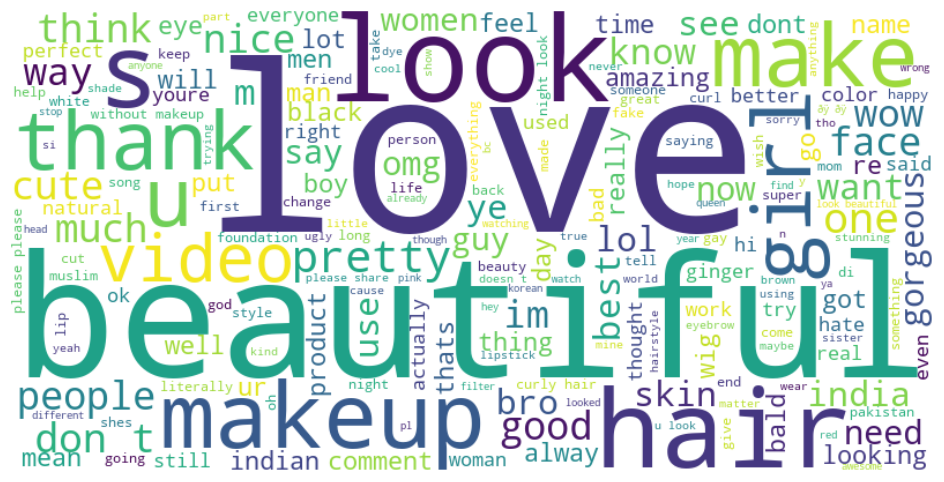

sentiment_label
neutral     369662
positive    285510
negative     69804
Name: count, dtype: int64


In [13]:
# --- Sentiment Analysis + Word Cloud on YouTube Comments ---
import pandas as pd
import re, string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

df = pd.read_csv('comments5_clean.csv')

# Download lexicon for VADER if not already
nltk.download('vader_lexicon')

# Assume df already loaded and has a column 'textOriginal' or 'comment'
# Adjust column name if needed
text_col = "textOriginal"   # change to your actual column name

# --- Clean text function ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df[text_col].apply(clean_text)

# --- Sentiment Analysis with VADER ---
sia = SentimentIntensityAnalyzer()
df["sentiment"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Optional: classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["sentiment_label"] = df["sentiment"].apply(classify_sentiment)

# --- Word Cloud ---
all_words = " ".join(df["clean_text"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="viridis", max_words=200).generate(all_words)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# --- Quick sentiment counts ---
print(df["sentiment_label"].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rayap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


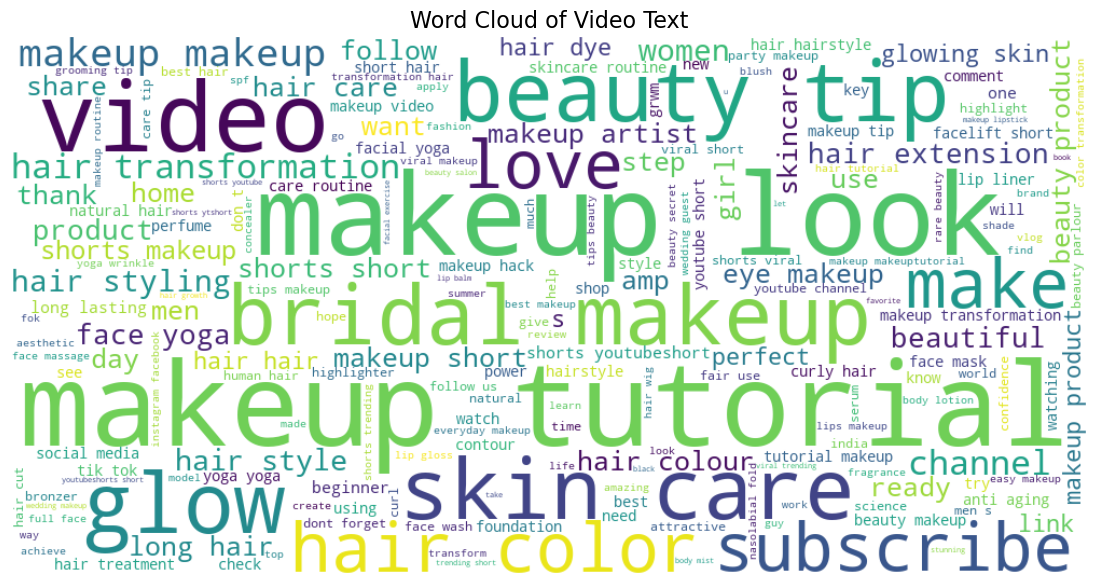

Sentiment counts:
sentiment_label
positive    55974
neutral     33333
negative     3452
Name: count, dtype: int64
Topic 1: grooming, women, use, fashion, video, look, products, body, men, beauty
Topic 2: facial, care, shorts, glow, yoga, beauty, skincare, tips, skin, face
Topic 3: blush, video, viral, bridal, lipstick, beauty, tutorial, look, shorts, makeup
Topic 4: key, parlour, nail, best, services, hair, eye, skin, salon, beauty
Topic 5: style, short, styling, color, haircut, shorts, transformation, hairstyles, hairstyle, hair


In [16]:
# --- Sentiment Analysis + Word Cloud + LDA for Video Dataset ---
import pandas as pd
import re, string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset
df_videos = pd.read_csv("videos_cleaned.csv")

# Download VADER lexicon
nltk.download("vader_lexicon")

# --- Clean text function ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # remove links
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Combine textual fields (title + description + tags)
df_videos["combined_text"] = (
    df_videos["title"].fillna("") + " " +
    df_videos["description"].fillna("") + " " +
    df_videos["clean_tags"].fillna("")
)

df_videos["clean_text"] = df_videos["combined_text"].apply(clean_text)

# --- Sentiment Analysis with VADER ---
sia = SentimentIntensityAnalyzer()
df_videos["sentiment"] = df_videos["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

def classify_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df_videos["sentiment_label"] = df_videos["sentiment"].apply(classify_sentiment)

# --- Word Cloud ---
all_words = " ".join(df_videos["clean_text"].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color="white",
                      colormap="viridis", max_words=200).generate(all_words)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Video Text", fontsize=16)
plt.show()

# --- Sentiment distribution ---
print("Sentiment counts:")
print(df_videos["sentiment_label"].value_counts())

# --- LDA Topic Modeling ---
# Convert text to Bag of Words
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words="english")
X = vectorizer.fit_transform(df_videos["clean_text"])

# Train LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show topics
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words = [words[j] for j in topic.argsort()[-10:]]
    print(f"Topic {i+1}: {', '.join(top_words)}")
